In [1]:
from sklearn.cluster import KMeans
from collections import Counter
from matplotlib import pyplot as plt
import cv2
import os
import json
import operator

# Utility function, rgb to hex
def rgb2hex(rgb):
    hex = "#{:02x}{:02x}{:02x}".format(int(rgb[0]), int(rgb[1]), int(rgb[2]))
    return hex

H:265.53134005763695
S:0.10431874336499346
V:0.19121554256150466
灰色


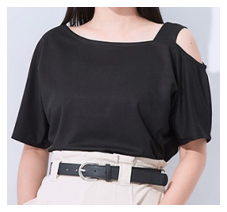

H:239.67255149950623
S:0.3270921053377234
V:0.29547562833844043
藍色


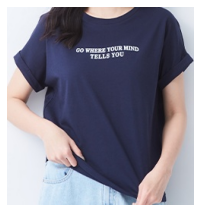

H:208.0289627621629
S:0.15089424593243234
V:0.9333350077862058
藍色


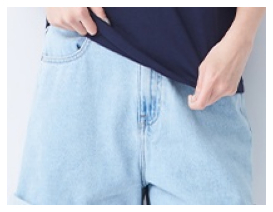

H:340.84912812737014
S:0.004748550054181627
V:0.9142175376235261
白色


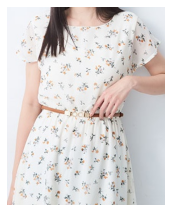

In [10]:
base_location = 'C:/Users/qingyu/Desktop/crop'
jList = os.listdir(base_location)

for file in jList:
    
    if file.endswith(".jpg"):
        img = cv2.imread(os.path.join(base_location,file))

        # load image
        #取最高的 k 個顏色
        k=3 
        #img_bgr = cv2.imread(path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # resize image to speed up processing time
        resized_img_rgb = cv2.resize(img_rgb, (64, 64), interpolation=cv2.INTER_AREA)

        # reshape the image to be a list of pixels
        img_list = resized_img_rgb.reshape((resized_img_rgb.shape[0] * resized_img_rgb.shape[1], 3))

        # cluster the pixels and assign labels
        clt = KMeans(n_clusters=k)
        labels = clt.fit_predict(img_list)  

        # count labels to find most popular
        label_counts = Counter(labels)
        total_count = sum(label_counts.values())
        new_dict = dict(label_counts)
        sort_new_dict = sorted(new_dict.items(), key=lambda item: item[1])
           
        # 佔比最多的顏色 index
        key = sort_new_dict[k-1][0]
        
        # 顏色比例
        for i in range(0,len(new_dict)):
            count = new_dict.get(i)
            percent = round(count/total_count*100)
            #print(percent)

        # subset out most popular centroid
        # RGB
        center_colors = list(clt.cluster_centers_)
        ordered_colors = [center_colors[i]/255 for i in label_counts.keys()]
        color_labels = [rgb2hex(ordered_colors[i]*255) for i in label_counts.keys()]   
    
        main_color_rgb = center_colors[key]
        #print(main_color_rgb)

        sort_main_color_rgb = sorted(main_color_rgb)             
            
        # RGB轉 HSV
        R = main_color_rgb[0]/255 
        G = main_color_rgb[1]/255 
        B = main_color_rgb[2]/255 
            
        max_num = sort_main_color_rgb[k-1]/255 
        min_num = sort_main_color_rgb[0]/255 
        d = max_num - min_num

        V = max_num          
            
        if max_num == 0:
            S = 0
        else:
            S = d/max_num
            
        if d == 0:
            H = 0
        if R == max_num and G >= B: 
            H = ( (G-B)/ d )* 60
        if R == max_num and G < B:
            H = ( (G-B)/ d )* 60 + 360
        if G == max_num:
            H = ( (B-R)/ d )* 60 + 120
        if B == max_num:
            H = ( (R-G)/ d )* 60 + 240
            
        print('H:'+str(H))
        print('S:'+str(S))
        print('V:'+str(V))
            
        #Smin = 43/255
        Smin = 38/255
        Vmin = 46/255
        Vmax = 220/255
        Swhite = 30/255
            
        if S>Smin and V>Vmin:
            if H<22:
                color = "red"
                print("红色")

            if H>=310 and H<=360:
                color = "red"
                print("红色")
                    
            if H>=22 and H<52 :
                color = "orange"
                print("橙色")

            if H>=52 and H<70 :
                color = "yellow"
                print("黄色")

            if H>=70 and H<156 :
                color = "green"
                print("綠色")

            if H>=156 and H<200 :
                color = "cyan"
                print("青色")

            if H>=200 and H<250 :
                color = "blue"
                print("藍色")

            if H>=250 and H<310 :
                color = "purple"
                print("紫色")               

        if V<=Vmin:
            color = "black"
            print("黑色")

        if V>=Vmin and V<=Vmax and S<=Vmin :
            color = "gray"
            print("灰色")   
                
        if S<=Swhite and V>Vmax :
                color = "white"
                print("白色")                         
            
        # plots
        plt.figure(figsize=(14, 8))
        plt.subplot(221)
        plt.imshow(img_rgb)
        plt.axis('off')

        #plt.subplot(222)
        #plt.pie(label_counts.values(), labels=color_labels, colors=ordered_colors, startangle=90)
        #plt.axis('equal')
        plt.show()
